In [41]:
import matplotlib.pyplot as plt 
import geopandas as gpd
import seaborn as sns

In [149]:
import os
import rasterio
from rasterio.plot import reshape_as_image
import PIL
PIL.Image.MAX_IMAGE_PIXELS = None
from PIL import Image
import sys
package = os.path.dirname(os.getcwd())
sys.path.append(package)
sys.path.append(package + 'utils')

In [6]:
trees = gpd.read_file('field_data.csv')

In [7]:
trees.head()

,name,latitude,longitude,diameter,height,year,plot_id,site,X,Y,updated diameter,group,AGB,carbon,geometry
0,Cacao,-2.18122567,-79.57663014,0.0,0.0,2016.0,P8,Nestor Macias RGB,2761.628614991289,6831.070677750942,6.843646549530001,cacao,5.444228267440376,2.1232490243017463,None
1,Cacao,-2.18131243,-79.57641229,0.0,0.0,2016.0,P8,Nestor Macias RGB,5067.14176493557,7729.961819882837,6.843646549530001,cacao,5.444228267440376,2.1232490243017463,None
2,Cacao,-2.18143761,-79.57632176,0.0,0.0,2016.0,P8,Nestor Macias RGB,6025.223497499373,9026.909643437912,6.843646549530001,cacao,5.444228267440376,2.1232490243017463,None
3,Cacao,-2.18159308,-79.57615373,0.0,0.0,2016.0,P8,Nestor Macias RGB,7803.490077975997,10637.681956329916,6.843646549530001,cacao,5.444228267440376,2.1232490243017463,None
4,Cacao,-2.18149765,-79.57617944,0.0,0.0,2016.0,P8,Nestor Macias RGB,7531.400369057465,9648.963863967534,6.843646549530001,cacao,5.444228267440376,2.1232490243017463,None


In [18]:
trees = gpd.GeoDataFrame(
    geometry=gpd.points_from_xy(trees.longitude, trees.latitude), data=trees
)

In [19]:
trees.head()

,name,latitude,longitude,diameter,height,year,plot_id,site,X,Y,updated diameter,group,AGB,carbon,geometry
0,Cacao,-2.18122567,-79.57663014,0.0,0.0,2016.0,P8,Nestor Macias RGB,2761.628614991289,6831.070677750942,6.843646549530001,cacao,5.444228267440376,2.1232490243017463,POINT (-79.57663 -2.18123)
1,Cacao,-2.18131243,-79.57641229,0.0,0.0,2016.0,P8,Nestor Macias RGB,5067.14176493557,7729.961819882837,6.843646549530001,cacao,5.444228267440376,2.1232490243017463,POINT (-79.57641 -2.18131)
2,Cacao,-2.18143761,-79.57632176,0.0,0.0,2016.0,P8,Nestor Macias RGB,6025.223497499373,9026.909643437912,6.843646549530001,cacao,5.444228267440376,2.1232490243017463,POINT (-79.57632 -2.18144)
3,Cacao,-2.18159308,-79.57615373,0.0,0.0,2016.0,P8,Nestor Macias RGB,7803.490077975997,10637.681956329916,6.843646549530001,cacao,5.444228267440376,2.1232490243017463,POINT (-79.57615 -2.18159)
4,Cacao,-2.18149765,-79.57617944,0.0,0.0,2016.0,P8,Nestor Macias RGB,7531.400369057465,9648.963863967534,6.843646549530001,cacao,5.444228267440376,2.1232490243017463,POINT (-79.57618 -2.18150)


In [21]:
trees.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 4663 entries, 0 to 4662
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   name              4663 non-null   object  
 1   latitude          4663 non-null   object  
 2   longitude         4663 non-null   object  
 3   diameter          4663 non-null   object  
 4   height            4663 non-null   object  
 5   year              4663 non-null   object  
 6   plot_id           4663 non-null   object  
 7   site              4663 non-null   object  
 8   X                 4663 non-null   object  
 9   Y                 4663 non-null   object  
 10  updated diameter  4663 non-null   object  
 11  group             4663 non-null   object  
 12  AGB               4663 non-null   object  
 13  carbon            4663 non-null   object  
 14  geometry          4663 non-null   geometry
dtypes: geometry(1), object(14)
memory usage: 546.6+ KB


In [28]:
trees['latitude'] = trees.latitude.astype(float)
trees['longitude'] = trees.longitude.astype(float)
trees['diameter'] = trees.diameter.astype(float)
trees['height'] = trees.height.astype(float)
trees['year'] = trees.year.astype(float)
trees['X'] = trees.X.astype(float)
trees['Y'] = trees.Y.astype(float)
trees['updated diameter'] = trees['updated diameter'].astype(float)
trees['AGB'] = trees.AGB.astype(float)
trees['carbon'] = trees.carbon.astype(float)

In [29]:
trees.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 4663 entries, 0 to 4662
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   name              4663 non-null   object  
 1   latitude          4663 non-null   float64 
 2   longitude         4663 non-null   float64 
 3   diameter          4663 non-null   float64 
 4   height            4663 non-null   float64 
 5   year              4663 non-null   float64 
 6   plot_id           4663 non-null   object  
 7   site              4663 non-null   object  
 8   X                 4663 non-null   float64 
 9   Y                 4663 non-null   float64 
 10  updated diameter  4663 non-null   float64 
 11  group             4663 non-null   object  
 12  AGB               4663 non-null   float64 
 13  carbon            4663 non-null   float64 
 14  geometry          4663 non-null   geometry
dtypes: float64(10), geometry(1), object(4)
memory usage: 546.6+ KB


In [186]:
trees['group'].value_counts()

group
cacao     2042
banana    1504
fruit      751
other      161
timber     137
citrus      68
Name: count, dtype: int64

In [187]:
trees['site'].value_counts()

site
Carlos Vera Guevara RGB    929
Nestor Macias RGB          872
Flora Pluas RGB            846
Leonor Aspiazu RGB         789
Carlos Vera Arteaga RGB    743
Manuel Macias RGB          484
Name: count, dtype: int64

In [188]:
trees.groupby(by = 'group')['AGB'].sum()

group
banana    14060.038199
cacao      9729.101401
citrus      753.056833
fruit     21524.928064
other      6086.846125
timber     8659.844050
Name: AGB, dtype: float64

In [30]:
trees.head()

,name,latitude,longitude,diameter,height,year,plot_id,site,X,Y,updated diameter,group,AGB,carbon,geometry
0,Cacao,-2.181226,-79.576630,0.0,0.0,2016.0,P8,Nestor Macias RGB,2761.628615,6831.070678,6.843647,cacao,5.444228,2.123249,POINT (-79.57663 -2.18123)
1,Cacao,-2.181312,-79.576412,0.0,0.0,2016.0,P8,Nestor Macias RGB,5067.141765,7729.961820,6.843647,cacao,5.444228,2.123249,POINT (-79.57641 -2.18131)
2,Cacao,-2.181438,-79.576322,0.0,0.0,2016.0,P8,Nestor Macias RGB,6025.223497,9026.909643,6.843647,cacao,5.444228,2.123249,POINT (-79.57632 -2.18144)
3,Cacao,-2.181593,-79.576154,0.0,0.0,2016.0,P8,Nestor Macias RGB,7803.490078,10637.681956,6.843647,cacao,5.444228,2.123249,POINT (-79.57615 -2.18159)
4,Cacao,-2.181498,-79.576179,0.0,0.0,2016.0,P8,Nestor Macias RGB,7531.400369,9648.963864,6.843647,cacao,5.444228,2.123249,POINT (-79.57618 -2.18150)


In [164]:
trees.loc[trees['group'] == 'timber']['name'].unique()

array(['Roble', 'Caoba', 'Laurel', 'Melina', 'Pachaco', 'Teca',
       'Guachapeli', 'Guayacan', 'Balsa', 'Cedro', 'Fernan Sanchez'],
      dtype=object)

In [163]:
trees['group'].unique()

array(['cacao', 'other', 'fruit', 'banana', 'citrus', 'timber'],
      dtype=object)

In [156]:
trees['site'].unique()

array(['Nestor Macias RGB', 'Leonor Aspiazu RGB',
       'Carlos Vera Arteaga RGB', 'Carlos Vera Guevara RGB',
       'Flora Pluas RGB', 'Manuel Macias RGB'], dtype=object)

In [151]:
trees['group'].unique()

array(['cacao', 'other', 'fruit', 'banana', 'citrus', 'timber'],
      dtype=object)

In [82]:
print(trees.loc[(trees['name'] == 'Cacao') & (trees['diameter'] == 0)].shape)
print(trees.loc[(trees['name'] == 'Cacao') & (trees['diameter'] == 0)].site.unique())
print(trees.loc[(trees['name'] == 'Cacao') & (trees['diameter'] == 0)]['year'].unique())

(1806, 15)
['Nestor Macias RGB' 'Leonor Aspiazu RGB' 'Carlos Vera Arteaga RGB'
 'Carlos Vera Guevara RGB' 'Flora Pluas RGB' 'Manuel Macias RGB']
[2016. 2018. 2017. 2019.]


In [49]:
print(trees.loc[(trees['name'] == 'Cacao') & (trees['diameter'] > 0)].shape)
trees.loc[(trees['name'] == 'Cacao') & (trees['diameter'] > 0)].head()

(236, 15)


,name,latitude,longitude,diameter,height,year,plot_id,site,X,Y,updated diameter,group,AGB,carbon,geometry
9,Cacao,-2.181145,-79.576385,6.079705,2.1,2016.0,P8,Nestor Macias RGB,5353.201074,5999.213027,6.079705,cacao,4.306795,1.679650,POINT (-79.57639 -2.18115)
14,Cacao,-2.181092,-79.576445,5.188439,2.0,2016.0,P8,Nestor Macias RGB,4722.875789,5444.295904,5.188439,cacao,3.146586,1.227169,POINT (-79.57644 -2.18109)
16,Cacao,-2.181181,-79.576097,7.027643,2.0,2016.0,P8,Nestor Macias RGB,8403.124574,6373.129363,7.027643,cacao,5.737862,2.237766,POINT (-79.57610 -2.18118)
17,Cacao,-2.181056,-79.576135,7.499136,2.0,2016.0,P8,Nestor Macias RGB,8001.181084,5071.519241,7.499136,cacao,6.525131,2.544801,POINT (-79.57614 -2.18106)
18,Cacao,-2.181037,-79.576133,6.989187,2.2,2016.0,P8,Nestor Macias RGB,8017.690611,4871.765654,6.989187,cacao,5.675861,2.213586,POINT (-79.57613 -2.18104)


In [87]:
# Mean and median diameter of non-zero Cacao trees
print(trees.loc[(trees['name'] == 'Cacao') & (trees['diameter'] > 0)].groupby(['year', 'site']).diameter.mean())
print(trees.loc[(trees['name'] == 'Cacao') & (trees['diameter'] > 0)].groupby(['year', 'site']).diameter.median())

year    site                   
2016.0  Carlos Vera Guevara RGB    4.580015
        Nestor Macias RGB          6.808206
2017.0  Carlos Vera Arteaga RGB    4.039266
        Flora Pluas RGB            5.740081
2018.0  Leonor Aspiazu RGB         3.282928
2019.0  Manuel Macias RGB          2.938046
Name: diameter, dtype: float64
year    site                   
2016.0  Carlos Vera Guevara RGB    4.478950
        Nestor Macias RGB          6.816449
2017.0  Carlos Vera Arteaga RGB    3.904530
        Flora Pluas RGB            5.558907
2018.0  Leonor Aspiazu RGB         3.157743
2019.0  Manuel Macias RGB          2.864782
Name: diameter, dtype: float64


<Axes: xlabel='year', ylabel='diameter'>

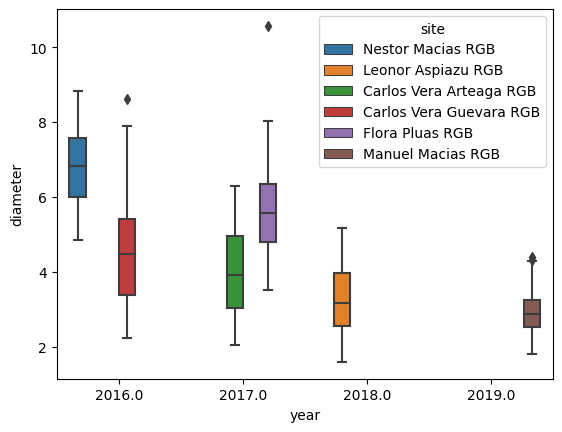

In [108]:
# Boxplot of non-zero Cacao trees with finite diameter
sns.boxplot(x = trees.loc[(trees['name'] == 'Cacao') & (trees['diameter'] > 0)].year, 
            y = trees.loc[(trees['name'] == 'Cacao') & (trees['diameter'] > 0)].diameter, 
            hue = trees.loc[(trees['name'] == 'Cacao') & (trees['diameter'] > 0)].site)

In [80]:
# Non Cacao trees with zero diameter entry
trees.loc[(trees['name'] != 'Cacao') & (trees['diameter'] == 0)]['name'].shape

(236,)

In [79]:
# Non Cacao trees with non-zero diameter entry
trees.loc[(trees['name'] != 'Cacao') & (trees['diameter'] != 0)]['name'].shape

(2385,)

In [109]:
trees.loc[(trees['name'] != 'Cacao') & (trees['diameter'] == 0)]['name'].unique()

array(['Guaba', 'Musacea', 'Otra variedad', 'Naranja', 'Sapote', 'Limon',
       'Bariable', 'Guayacan', 'Balsa', 'Melina', 'Roble', 'Caoba',
       'Mango', 'Cedro', 'Achotillo', 'Guachapeli', 'Guanabana',
       'Mandarina', 'Laurel', 'Fernan Sanchez', 'MaraÃ±on'], dtype=object)

In [110]:
trees.loc[(trees['name'] != 'Cacao') & (trees['diameter'] != 0)]['name'].unique()

array(['Variedad bifurcada', 'Guaba', 'Otra variedad', 'Musacea',
       'Sapote', 'Naranja', 'Roble', 'Mango', 'Caoba', 'Laurel', 'Melina',
       'Pachaco', 'Teca', 'Guachapeli', 'Guayacan', 'Guanabana', 'Cedro',
       'Fernan Sanchez', 'Mandarina', 'Achotillo', 'Yafruit',
       'Fruta de Pan', 'MaraÃ±on'], dtype=object)

year    site                   
2016.0  Carlos Vera Guevara RGB     8.819683
        Nestor Macias RGB          10.941214
2017.0  Carlos Vera Arteaga RGB     6.519013
        Flora Pluas RGB            10.855005
2018.0  Leonor Aspiazu RGB          4.281981
2019.0  Manuel Macias RGB           5.281164
Name: diameter, dtype: float64
year    site                   
2016.0  Carlos Vera Guevara RGB     8.594347
        Nestor Macias RGB          10.360963
2017.0  Carlos Vera Arteaga RGB     5.729565
        Flora Pluas RGB            10.822511
2018.0  Leonor Aspiazu RGB          3.819710
2019.0  Manuel Macias RGB           4.838299
Name: diameter, dtype: float64
zero diameter Guabas (70, 15)
non-zero diameter Guabas (527, 15)


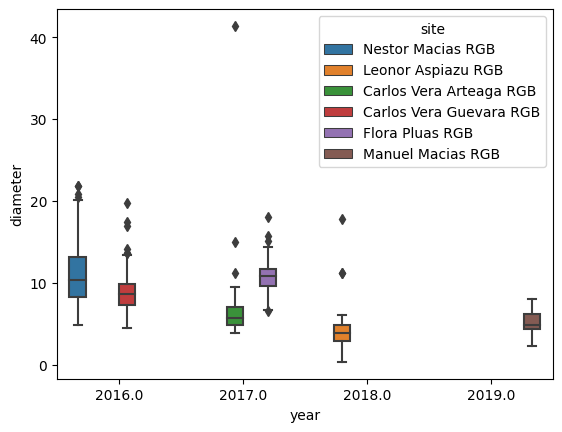

In [117]:
# Boxplot of non-zero Guaba trees with finite diameter
sns.boxplot(x = trees.loc[(trees['name'] == 'Guaba') & (trees['diameter'] > 0)].year, 
            y = trees.loc[(trees['name'] == 'Guaba') & (trees['diameter'] > 0)].diameter, 
            hue = trees.loc[(trees['name'] == 'Guaba') & (trees['diameter'] > 0)].site)

# Mean and median diameter of non-zero Guaba trees
print(trees.loc[(trees['name'] == 'Guaba') & (trees['diameter'] > 0)].groupby(['year', 'site']).diameter.mean())
print(trees.loc[(trees['name'] == 'Guaba') & (trees['diameter'] > 0)].groupby(['year', 'site']).diameter.median())

# Guaba trees with zero diameter count
print('zero diameter Guabas', trees.loc[(trees['name'] == 'Guaba') & (trees['diameter'] == 0)].shape)

# Guaba trees with non-zero diameter count
print('non-zero diameter Guabas', trees.loc[(trees['name'] == 'Guaba') & (trees['diameter'] != 0)].shape)

year    site                   
2016.0  Carlos Vera Guevara RGB    14.112463
        Nestor Macias RGB          12.724191
2017.0  Carlos Vera Arteaga RGB    13.734233
        Flora Pluas RGB            15.705510
2018.0  Leonor Aspiazu RGB         16.268547
2019.0  Manuel Macias RGB          21.829127
Name: diameter, dtype: float64
year    site                   
2016.0  Carlos Vera Guevara RGB    13.687293
        Nestor Macias RGB          11.872931
2017.0  Carlos Vera Arteaga RGB    12.732366
        Flora Pluas RGB            15.533486
2018.0  Leonor Aspiazu RGB         16.233766
2019.0  Manuel Macias RGB          20.371785
Name: diameter, dtype: float64
zero diameter Musacea (24, 15)
non-zero diameter Musacea (1480, 15)


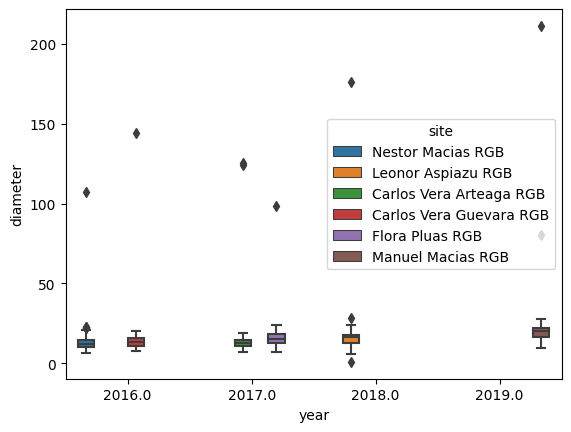

In [118]:
# Boxplot of non-zero Musacea trees with finite diameter
sns.boxplot(x = trees.loc[(trees['name'] == 'Musacea') & (trees['diameter'] > 0)].year, 
            y = trees.loc[(trees['name'] == 'Musacea') & (trees['diameter'] > 0)].diameter, 
            hue = trees.loc[(trees['name'] == 'Musacea') & (trees['diameter'] > 0)].site)

# Mean and median diameter of non-zero Musacea trees
print(trees.loc[(trees['name'] == 'Musacea') & (trees['diameter'] > 0)].groupby(['year', 'site']).diameter.mean())
print(trees.loc[(trees['name'] == 'Musacea') & (trees['diameter'] > 0)].groupby(['year', 'site']).diameter.median())

# Musacea trees with zero diameter count
print('zero diameter Musacea', trees.loc[(trees['name'] == 'Musacea') & (trees['diameter'] == 0)].shape)

# Musacea trees with non-zero diameter count
print('non-zero diameter Musacea', trees.loc[(trees['name'] == 'Musacea') & (trees['diameter'] != 0)].shape)

year    site                   
2016.0  Carlos Vera Guevara RGB     7.484812
        Nestor Macias RGB           8.665082
2017.0  Carlos Vera Arteaga RGB     8.992233
        Flora Pluas RGB            15.522876
2018.0  Leonor Aspiazu RGB         12.498939
2019.0  Manuel Macias RGB           4.201681
Name: diameter, dtype: float64
year    site                   
2016.0  Carlos Vera Guevara RGB     6.939139
        Nestor Macias RGB           8.594347
2017.0  Carlos Vera Arteaga RGB     8.912656
        Flora Pluas RGB            19.639674
2018.0  Leonor Aspiazu RGB         10.058569
2019.0  Manuel Macias RGB           4.138019
Name: diameter, dtype: float64
zero diameter Otra variedad (5, 15)
non-zero diameter Otra variedad (81, 15)


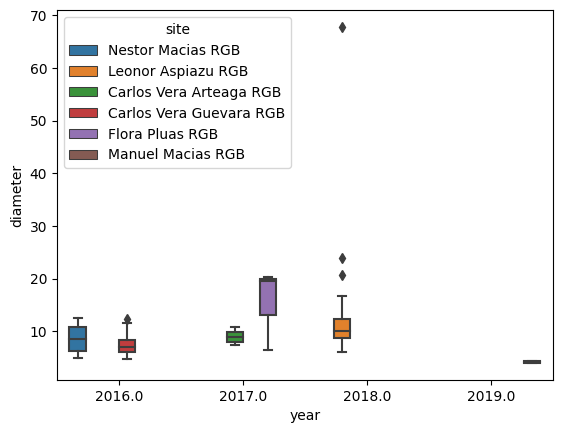

In [119]:
# Boxplot of non-zero Otra variedad trees with finite diameter
sns.boxplot(x = trees.loc[(trees['name'] == 'Otra variedad') & (trees['diameter'] > 0)].year, 
            y = trees.loc[(trees['name'] == 'Otra variedad') & (trees['diameter'] > 0)].diameter, 
            hue = trees.loc[(trees['name'] == 'Otra variedad') & (trees['diameter'] > 0)].site)

# Mean and median diameter of non-zero Otra variedad trees
print(trees.loc[(trees['name'] == 'Otra variedad') & (trees['diameter'] > 0)].groupby(['year', 'site']).diameter.mean())
print(trees.loc[(trees['name'] == 'Otra variedad') & (trees['diameter'] > 0)].groupby(['year', 'site']).diameter.median())

# Otra variedad trees with zero diameter count
print('zero diameter Otra variedad', trees.loc[(trees['name'] == 'Otra variedad') & (trees['diameter'] == 0)].shape)

# Otra variedad trees with non-zero diameter count
print('non-zero diameter Otra variedad', trees.loc[(trees['name'] == 'Otra variedad') & (trees['diameter'] != 0)].shape)

year    site             
2016.0  Nestor Macias RGB     5.411255
2017.0  Flora Pluas RGB      14.323911
Name: diameter, dtype: float64
year    site             
2016.0  Nestor Macias RGB     5.411255
2017.0  Flora Pluas RGB      14.323911
Name: diameter, dtype: float64
zero diameter Naranja (40, 15)
non-zero diameter Naranja (2, 15)


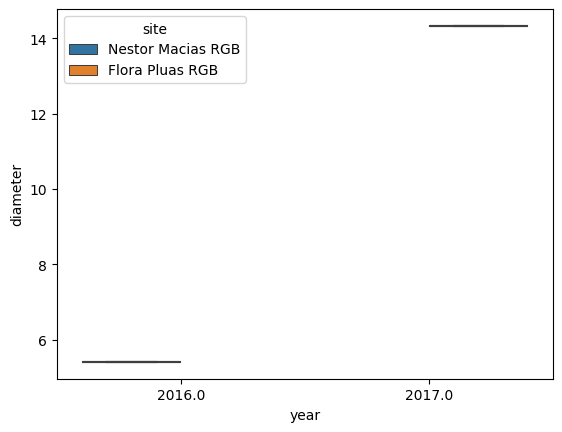

In [120]:
# Boxplot of non-zero Naranja trees with finite diameter
sns.boxplot(x = trees.loc[(trees['name'] == 'Naranja') & (trees['diameter'] > 0)].year, 
            y = trees.loc[(trees['name'] == 'Naranja') & (trees['diameter'] > 0)].diameter, 
            hue = trees.loc[(trees['name'] == 'Naranja') & (trees['diameter'] > 0)].site)

# Mean and median diameter of non-zero Naranja trees
print(trees.loc[(trees['name'] == 'Naranja') & (trees['diameter'] > 0)].groupby(['year', 'site']).diameter.mean())
print(trees.loc[(trees['name'] == 'Naranja') & (trees['diameter'] > 0)].groupby(['year', 'site']).diameter.median())

# Naranja trees with zero diameter count
print('zero diameter Naranja', trees.loc[(trees['name'] == 'Naranja') & (trees['diameter'] == 0)].shape)

# Naranja trees with non-zero diameter count
print('non-zero diameter Naranja', trees.loc[(trees['name'] == 'Naranja') & (trees['diameter'] != 0)].shape)

year    site                   
2016.0  Carlos Vera Guevara RGB    4.201681
        Nestor Macias RGB          9.188524
2017.0  Carlos Vera Arteaga RGB    5.092946
Name: diameter, dtype: float64
year    site                   
2016.0  Carlos Vera Guevara RGB    4.201681
        Nestor Macias RGB          7.639419
2017.0  Carlos Vera Arteaga RGB    5.092946
Name: diameter, dtype: float64
zero diameter Sapote (17, 15)
non-zero diameter Sapote (5, 15)


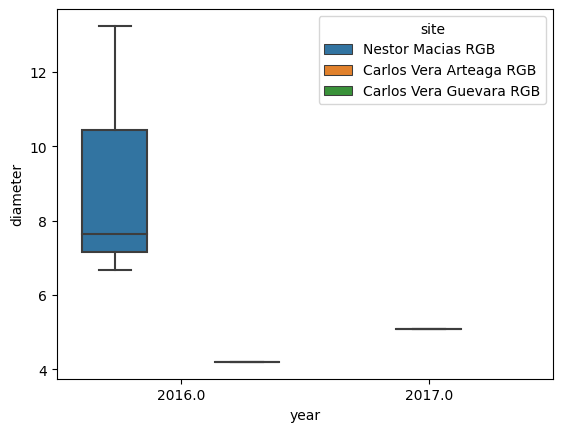

In [121]:
# Boxplot of non-zero Sapote trees with finite diameter
sns.boxplot(x = trees.loc[(trees['name'] == 'Sapote') & (trees['diameter'] > 0)].year, 
            y = trees.loc[(trees['name'] == 'Sapote') & (trees['diameter'] > 0)].diameter, 
            hue = trees.loc[(trees['name'] == 'Sapote') & (trees['diameter'] > 0)].site)

# Mean and median diameter of non-zero Sapote trees
print(trees.loc[(trees['name'] == 'Sapote') & (trees['diameter'] > 0)].groupby(['year', 'site']).diameter.mean())
print(trees.loc[(trees['name'] == 'Sapote') & (trees['diameter'] > 0)].groupby(['year', 'site']).diameter.median())

# Sapote trees with zero diameter count
print('zero diameter Sapote', trees.loc[(trees['name'] == 'Sapote') & (trees['diameter'] == 0)].shape)

# Sapote trees with non-zero diameter count
print('non-zero diameter Sapote', trees.loc[(trees['name'] == 'Sapote') & (trees['diameter'] != 0)].shape)

In [123]:
# Repeat for Limon
# Limon has all zeros

print(trees.loc[(trees['name'] == 'Limon') & (trees['diameter'] > 0)].groupby(['year', 'site']).diameter.mean())
print(trees.loc[(trees['name'] == 'Limon') & (trees['diameter'] > 0)].groupby(['year', 'site']).diameter.median())

print('zero diameter Limon', trees.loc[(trees['name'] == 'Limon') & (trees['diameter'] == 0)].shape)

print('non-zero diameter Limon', trees.loc[(trees['name'] == 'Limon') & (trees['diameter'] != 0)].shape)

Series([], Name: diameter, dtype: float64)
Series([], Name: diameter, dtype: float64)
zero diameter Limon (23, 15)
non-zero diameter Limon (0, 15)


In [127]:
# Repeat for Bariable
print(trees.loc[(trees['name'] == 'Bariable') & (trees['diameter'] > 0)].groupby(['year', 'site']).diameter.mean())
print(trees.loc[(trees['name'] == 'Bariable') & (trees['diameter'] > 0)].groupby(['year', 'site']).diameter.median())

print('zero diameter Bariable', trees.loc[(trees['name'] == 'Bariable') & (trees['diameter'] == 0)].shape)

print('non-zero diameter Bariable', trees.loc[(trees['name'] == 'Bariable') & (trees['diameter'] != 0)].shape)

Series([], Name: diameter, dtype: float64)
Series([], Name: diameter, dtype: float64)
zero diameter Bariable (1, 15)
non-zero diameter Bariable (0, 15)


In [128]:
# Repeat for Balsa
print(trees.loc[(trees['name'] == 'Balsa') & (trees['diameter'] > 0)].groupby(['year', 'site']).diameter.mean())
print(trees.loc[(trees['name'] == 'Balsa') & (trees['diameter'] > 0)].groupby(['year', 'site']).diameter.median())

print('zero diameter Balsa', trees.loc[(trees['name'] == 'Balsa') & (trees['diameter'] == 0)].shape)

print('non-zero diameter Balsa', trees.loc[(trees['name'] == 'Balsa') & (trees['diameter'] != 0)].shape)

Series([], Name: diameter, dtype: float64)
Series([], Name: diameter, dtype: float64)
zero diameter Balsa (1, 15)
non-zero diameter Balsa (0, 15)


year    site                   
2016.0  Carlos Vera Guevara RGB    14.519444
        Nestor Macias RGB          23.363891
2017.0  Flora Pluas RGB            24.477973
2018.0  Leonor Aspiazu RGB         14.124968
Name: diameter, dtype: float64
year    site                   
2016.0  Carlos Vera Guevara RGB    17.507003
        Nestor Macias RGB          23.363891
2017.0  Flora Pluas RGB            24.127833
2018.0  Leonor Aspiazu RGB         14.960530
Name: diameter, dtype: float64
zero diameter Melina (2, 15)
non-zero diameter Melina (16, 15)


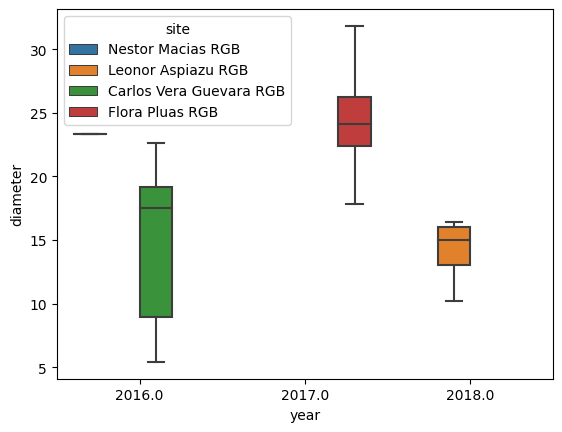

In [132]:
# Repeat for Melina
sns.boxplot(x = trees.loc[(trees['name'] == 'Melina') & (trees['diameter'] > 0)].year, 
            y = trees.loc[(trees['name'] == 'Melina') & (trees['diameter'] > 0)].diameter, 
            hue = trees.loc[(trees['name'] == 'Melina') & (trees['diameter'] > 0)].site)

print(trees.loc[(trees['name'] == 'Melina') & (trees['diameter'] > 0)].groupby(['year', 'site']).diameter.mean())
print(trees.loc[(trees['name'] == 'Melina') & (trees['diameter'] > 0)].groupby(['year', 'site']).diameter.median())

print('zero diameter Melina', trees.loc[(trees['name'] == 'Melina') & (trees['diameter'] == 0)].shape)

print('non-zero diameter Melina', trees.loc[(trees['name'] == 'Melina') & (trees['diameter'] != 0)].shape)

year    site                   
2016.0  Carlos Vera Guevara RGB     8.822951
        Nestor Macias RGB          12.279659
2017.0  Carlos Vera Arteaga RGB     4.774637
2018.0  Leonor Aspiazu RGB          5.403298
Name: diameter, dtype: float64
year    site                   
2016.0  Carlos Vera Guevara RGB     9.103641
        Nestor Macias RGB          12.191240
2017.0  Carlos Vera Arteaga RGB     4.774637
2018.0  Leonor Aspiazu RGB          5.952381
Name: diameter, dtype: float64
zero diameter Roble (2, 15)
non-zero diameter Roble (25, 15)


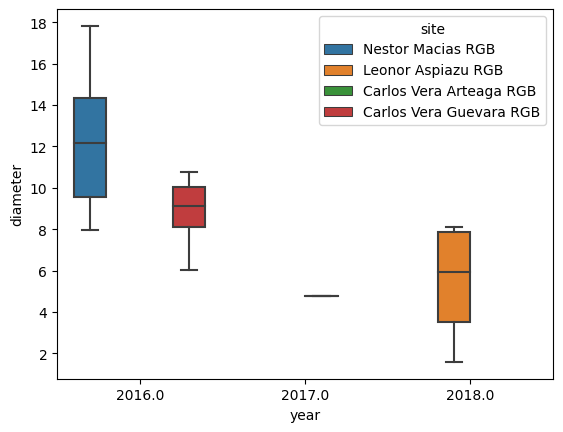

In [131]:
# Repeat for Roble
sns.boxplot(x = trees.loc[(trees['name'] == 'Roble') & (trees['diameter'] > 0)].year, 
            y = trees.loc[(trees['name'] == 'Roble') & (trees['diameter'] > 0)].diameter, 
            hue = trees.loc[(trees['name'] == 'Roble') & (trees['diameter'] > 0)].site)

print(trees.loc[(trees['name'] == 'Roble') & (trees['diameter'] > 0)].groupby(['year', 'site']).diameter.mean())
print(trees.loc[(trees['name'] == 'Roble') & (trees['diameter'] > 0)].groupby(['year', 'site']).diameter.median())

print('zero diameter Roble', trees.loc[(trees['name'] == 'Roble') & (trees['diameter'] == 0)].shape)

print('non-zero diameter Roble', trees.loc[(trees['name'] == 'Roble') & (trees['diameter'] != 0)].shape)

year    site                   
2016.0  Carlos Vera Guevara RGB    8.196460
        Nestor Macias RGB          9.421951
2017.0  Carlos Vera Arteaga RGB    5.092946
        Flora Pluas RGB            8.848994
2018.0  Leonor Aspiazu RGB         4.663229
Name: diameter, dtype: float64
year    site                   
2016.0  Carlos Vera Guevara RGB    8.196460
        Nestor Macias RGB          9.421951
2017.0  Carlos Vera Arteaga RGB    5.092946
        Flora Pluas RGB            8.848994
2018.0  Leonor Aspiazu RGB         4.615483
Name: diameter, dtype: float64
zero diameter Caoba (4, 15)
non-zero diameter Caoba (11, 15)


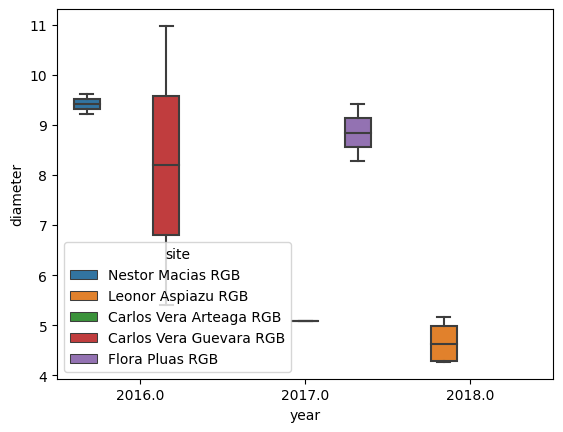

In [134]:
# Repeat for Caoba
sns.boxplot(x = trees.loc[(trees['name'] == 'Caoba') & (trees['diameter'] > 0)].year, 
            y = trees.loc[(trees['name'] == 'Caoba') & (trees['diameter'] > 0)].diameter, 
            hue = trees.loc[(trees['name'] == 'Caoba') & (trees['diameter'] > 0)].site)

print(trees.loc[(trees['name'] == 'Caoba') & (trees['diameter'] > 0)].groupby(['year', 'site']).diameter.mean())
print(trees.loc[(trees['name'] == 'Caoba') & (trees['diameter'] > 0)].groupby(['year', 'site']).diameter.median())

print('zero diameter Caoba', trees.loc[(trees['name'] == 'Caoba') & (trees['diameter'] == 0)].shape)

print('non-zero diameter Caoba', trees.loc[(trees['name'] == 'Caoba') & (trees['diameter'] != 0)].shape)

In [ ]:
# 'Mango', 'Cedro', 'Achotillo', 'Guachapeli', 'Guanabana', 'Mandarina', 'Laurel', 'Fernan Sanchez', 'MaraÃ±on'

year    site                   
2016.0  Carlos Vera Guevara RGB    5.935375
        Nestor Macias RGB          5.172524
2017.0  Flora Pluas RGB            6.493506
2018.0  Leonor Aspiazu RGB         3.023937
Name: diameter, dtype: float64
year    site                   
2016.0  Carlos Vera Guevara RGB    5.220270
        Nestor Macias RGB          5.172524
2017.0  Flora Pluas RGB            6.111536
2018.0  Leonor Aspiazu RGB         2.864782
Name: diameter, dtype: float64
zero diameter Mango (6, 15)
non-zero diameter Mango (83, 15)


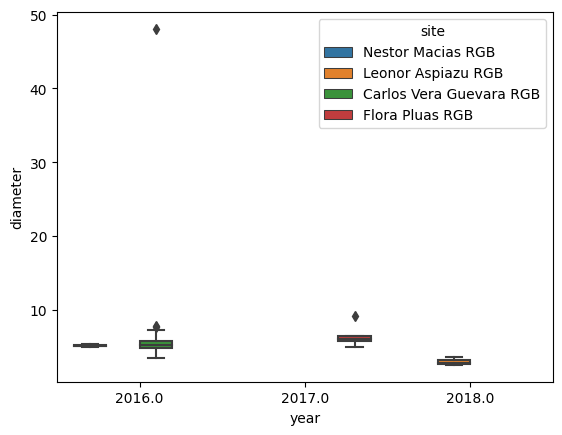

In [135]:
# Repeat for Mango
sns.boxplot(x = trees.loc[(trees['name'] == 'Mango') & (trees['diameter'] > 0)].year, 
            y = trees.loc[(trees['name'] == 'Mango') & (trees['diameter'] > 0)].diameter, 
            hue = trees.loc[(trees['name'] == 'Mango') & (trees['diameter'] > 0)].site)

print(trees.loc[(trees['name'] == 'Mango') & (trees['diameter'] > 0)].groupby(['year', 'site']).diameter.mean())
print(trees.loc[(trees['name'] == 'Mango') & (trees['diameter'] > 0)].groupby(['year', 'site']).diameter.median())

print('zero diameter Mango', trees.loc[(trees['name'] == 'Mango') & (trees['diameter'] == 0)].shape)

print('non-zero diameter Mango', trees.loc[(trees['name'] == 'Mango') & (trees['diameter'] != 0)].shape)

year    site                   
2017.0  Carlos Vera Arteaga RGB    5.092946
        Flora Pluas RGB            8.944487
2018.0  Leonor Aspiazu RGB         8.912656
Name: diameter, dtype: float64
year    site                   
2017.0  Carlos Vera Arteaga RGB    5.092946
        Flora Pluas RGB            8.944487
2018.0  Leonor Aspiazu RGB         8.912656
Name: diameter, dtype: float64
zero diameter Cedro (4, 15)
non-zero diameter Cedro (4, 15)


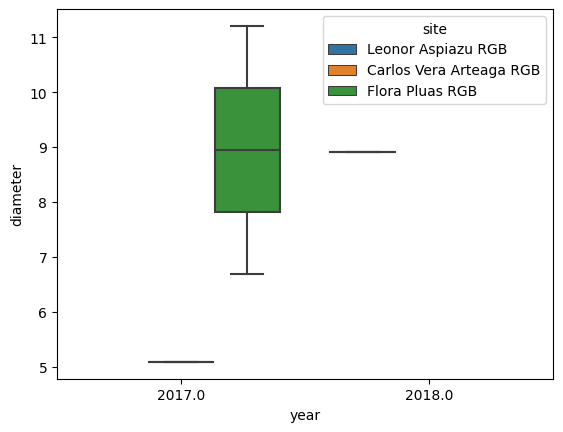

In [136]:
# Repeat for Cedro
sns.boxplot(x = trees.loc[(trees['name'] == 'Cedro') & (trees['diameter'] > 0)].year, 
            y = trees.loc[(trees['name'] == 'Cedro') & (trees['diameter'] > 0)].diameter, 
            hue = trees.loc[(trees['name'] == 'Cedro') & (trees['diameter'] > 0)].site)

print(trees.loc[(trees['name'] == 'Cedro') & (trees['diameter'] > 0)].groupby(['year', 'site']).diameter.mean())
print(trees.loc[(trees['name'] == 'Cedro') & (trees['diameter'] > 0)].groupby(['year', 'site']).diameter.median())

print('zero diameter Cedro', trees.loc[(trees['name'] == 'Cedro') & (trees['diameter'] == 0)].shape)

print('non-zero diameter Cedro', trees.loc[(trees['name'] == 'Cedro') & (trees['diameter'] != 0)].shape)

year    site                   
2016.0  Carlos Vera Guevara RGB    5.013369
2017.0  Flora Pluas RGB            5.490833
2019.0  Manuel Macias RGB          2.387319
Name: diameter, dtype: float64
year    site                   
2016.0  Carlos Vera Guevara RGB    5.013369
2017.0  Flora Pluas RGB            5.490833
2019.0  Manuel Macias RGB          2.387319
Name: diameter, dtype: float64
zero diameter Achotillo (12, 15)
non-zero diameter Achotillo (5, 15)


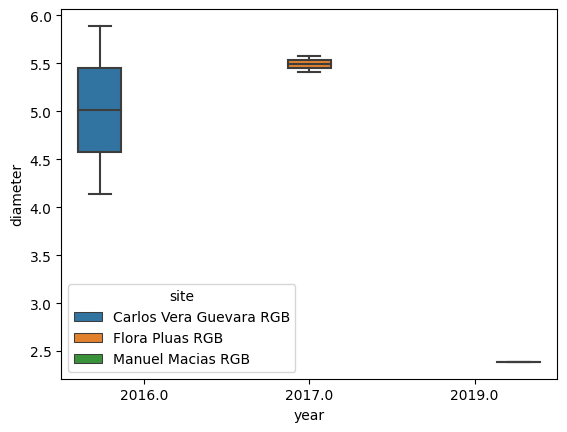

In [137]:
# Repeat for Achotillo
sns.boxplot(x = trees.loc[(trees['name'] == 'Achotillo') & (trees['diameter'] > 0)].year, 
            y = trees.loc[(trees['name'] == 'Achotillo') & (trees['diameter'] > 0)].diameter, 
            hue = trees.loc[(trees['name'] == 'Achotillo') & (trees['diameter'] > 0)].site)

print(trees.loc[(trees['name'] == 'Achotillo') & (trees['diameter'] > 0)].groupby(['year', 'site']).diameter.mean())
print(trees.loc[(trees['name'] == 'Achotillo') & (trees['diameter'] > 0)].groupby(['year', 'site']).diameter.median())

print('zero diameter Achotillo', trees.loc[(trees['name'] == 'Achotillo') & (trees['diameter'] == 0)].shape)

print('non-zero diameter Achotillo', trees.loc[(trees['name'] == 'Achotillo') & (trees['diameter'] != 0)].shape)

In [139]:
# Repeat for Guachapelli

print(trees.loc[(trees['name'] == 'Guachapelli') & (trees['diameter'] > 0)].groupby(['year', 'site']).diameter.mean())
print(trees.loc[(trees['name'] == 'Guachapelli') & (trees['diameter'] > 0)].groupby(['year', 'site']).diameter.median())

print('zero diameter Guachapelli', trees.loc[(trees['name'] == 'Guachapelli') & (trees['diameter'] == 0)].shape)

print('non-zero diameter Guachapelli', trees.loc[(trees['name'] == 'Guachapelli') & (trees['diameter'] != 0)].shape)

Series([], Name: diameter, dtype: float64)
Series([], Name: diameter, dtype: float64)
zero diameter Guachapelli (0, 15)
non-zero diameter Guachapelli (0, 15)


year    site                   
2017.0  Carlos Vera Arteaga RGB    4.578346
2018.0  Leonor Aspiazu RGB         3.660555
2019.0  Manuel Macias RGB          3.543842
Name: diameter, dtype: float64
year    site                   
2017.0  Carlos Vera Arteaga RGB    4.504074
2018.0  Leonor Aspiazu RGB         3.501401
2019.0  Manuel Macias RGB          3.947033
Name: diameter, dtype: float64
zero diameter Guanabana (8, 15)
non-zero diameter Guanabana (12, 15)


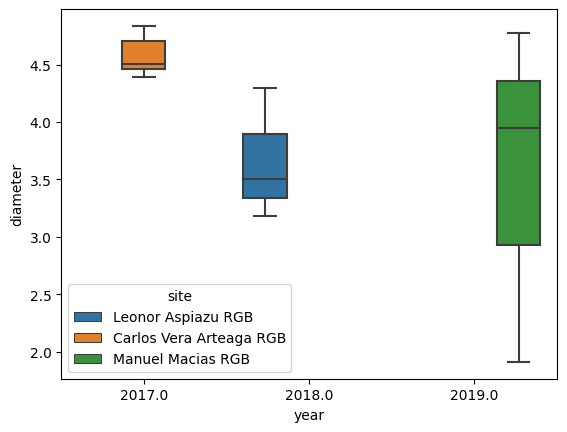

In [140]:
# Repeat for Guanabana
sns.boxplot(x = trees.loc[(trees['name'] == 'Guanabana') & (trees['diameter'] > 0)].year, 
            y = trees.loc[(trees['name'] == 'Guanabana') & (trees['diameter'] > 0)].diameter, 
            hue = trees.loc[(trees['name'] == 'Guanabana') & (trees['diameter'] > 0)].site)

print(trees.loc[(trees['name'] == 'Guanabana') & (trees['diameter'] > 0)].groupby(['year', 'site']).diameter.mean())
print(trees.loc[(trees['name'] == 'Guanabana') & (trees['diameter'] > 0)].groupby(['year', 'site']).diameter.median())

print('zero diameter Guanabana', trees.loc[(trees['name'] == 'Guanabana') & (trees['diameter'] == 0)].shape)

print('non-zero diameter Guanabana', trees.loc[(trees['name'] == 'Guanabana') & (trees['diameter'] != 0)].shape)

year    site                   
2017.0  Carlos Vera Arteaga RGB    3.183091
Name: diameter, dtype: float64
year    site                   
2017.0  Carlos Vera Arteaga RGB    3.183091
Name: diameter, dtype: float64
zero diameter Mandarina (2, 15)
non-zero diameter Mandarina (1, 15)


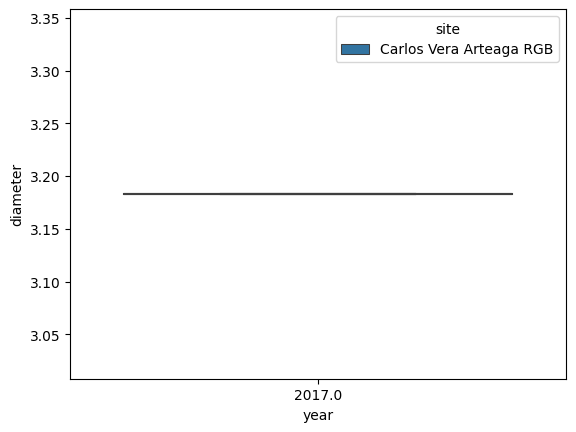

In [141]:
# Repeat for Mandarina
sns.boxplot(x = trees.loc[(trees['name'] == 'Mandarina') & (trees['diameter'] > 0)].year, 
            y = trees.loc[(trees['name'] == 'Mandarina') & (trees['diameter'] > 0)].diameter, 
            hue = trees.loc[(trees['name'] == 'Mandarina') & (trees['diameter'] > 0)].site)

print(trees.loc[(trees['name'] == 'Mandarina') & (trees['diameter'] > 0)].groupby(['year', 'site']).diameter.mean())
print(trees.loc[(trees['name'] == 'Mandarina') & (trees['diameter'] > 0)].groupby(['year', 'site']).diameter.median())

print('zero diameter Mandarina', trees.loc[(trees['name'] == 'Mandarina') & (trees['diameter'] == 0)].shape)

print('non-zero diameter Mandarina', trees.loc[(trees['name'] == 'Mandarina') & (trees['diameter'] != 0)].shape)

year    site                   
2016.0  Nestor Macias RGB          19.576012
2017.0  Carlos Vera Arteaga RGB     4.567736
        Flora Pluas RGB            13.549359
Name: diameter, dtype: float64
year    site                   
2016.0  Nestor Macias RGB          19.576012
2017.0  Carlos Vera Arteaga RGB     4.567736
        Flora Pluas RGB            13.528139
Name: diameter, dtype: float64
zero diameter Laurel (3, 15)
non-zero diameter Laurel (7, 15)


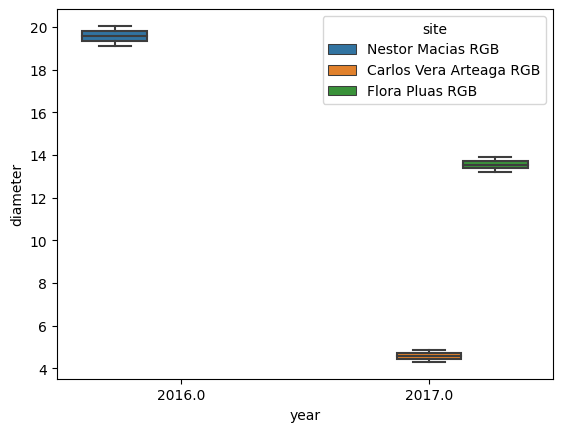

In [142]:
# Repeat for Laurel
sns.boxplot(x = trees.loc[(trees['name'] == 'Laurel') & (trees['diameter'] > 0)].year, 
            y = trees.loc[(trees['name'] == 'Laurel') & (trees['diameter'] > 0)].diameter, 
            hue = trees.loc[(trees['name'] == 'Laurel') & (trees['diameter'] > 0)].site)

print(trees.loc[(trees['name'] == 'Laurel') & (trees['diameter'] > 0)].groupby(['year', 'site']).diameter.mean())
print(trees.loc[(trees['name'] == 'Laurel') & (trees['diameter'] > 0)].groupby(['year', 'site']).diameter.median())

print('zero diameter Laurel', trees.loc[(trees['name'] == 'Laurel') & (trees['diameter'] == 0)].shape)

print('non-zero diameter Laurel', trees.loc[(trees['name'] == 'Laurel') & (trees['diameter'] != 0)].shape)

year    site                   
2016.0  Carlos Vera Guevara RGB    5.172524
2017.0  Carlos Vera Arteaga RGB    5.138419
Name: diameter, dtype: float64
year    site                   
2016.0  Carlos Vera Guevara RGB    5.172524
2017.0  Carlos Vera Arteaga RGB    4.647313
Name: diameter, dtype: float64
zero diameter Fernan Sanchez (8, 15)
non-zero diameter Fernan Sanchez (16, 15)


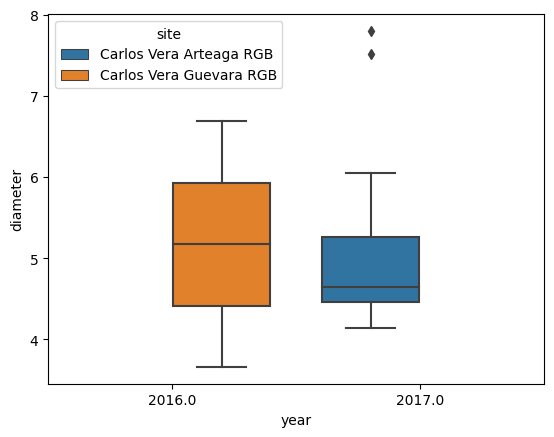

In [143]:
# Repeat for Fernan Sanchez
sns.boxplot(x = trees.loc[(trees['name'] == 'Fernan Sanchez') & (trees['diameter'] > 0)].year, 
            y = trees.loc[(trees['name'] == 'Fernan Sanchez') & (trees['diameter'] > 0)].diameter, 
            hue = trees.loc[(trees['name'] == 'Fernan Sanchez') & (trees['diameter'] > 0)].site)

print(trees.loc[(trees['name'] == 'Fernan Sanchez') & (trees['diameter'] > 0)].groupby(['year', 'site']).diameter.mean())
print(trees.loc[(trees['name'] == 'Fernan Sanchez') & (trees['diameter'] > 0)].groupby(['year', 'site']).diameter.median())

print('zero diameter Fernan Sanchez', trees.loc[(trees['name'] == 'Fernan Sanchez') & (trees['diameter'] == 0)].shape)

print('non-zero diameter Fernan Sanchez', trees.loc[(trees['name'] == 'Fernan Sanchez') & (trees['diameter'] != 0)].shape)

year    site                   
2016.0  Carlos Vera Guevara RGB    7.957729
Name: diameter, dtype: float64
year    site                   
2016.0  Carlos Vera Guevara RGB    7.957729
Name: diameter, dtype: float64
zero diameter MaraÃ±on (1, 15)
non-zero diameter MaraÃ±on (1, 15)


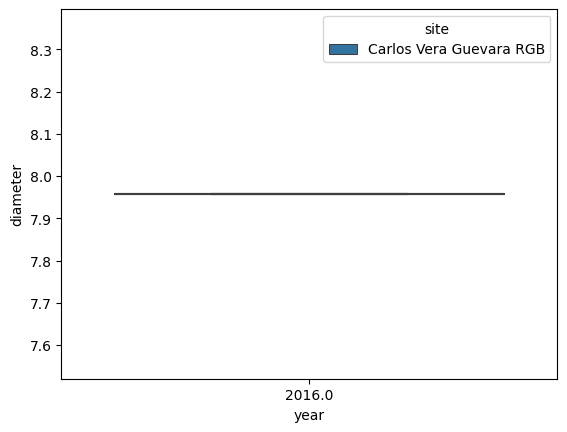

In [144]:
# Repeat for MaraÃ±on
sns.boxplot(x = trees.loc[(trees['name'] == 'MaraÃ±on') & (trees['diameter'] > 0)].year, 
            y = trees.loc[(trees['name'] == 'MaraÃ±on') & (trees['diameter'] > 0)].diameter, 
            hue = trees.loc[(trees['name'] == 'MaraÃ±on') & (trees['diameter'] > 0)].site)

print(trees.loc[(trees['name'] == 'MaraÃ±on') & (trees['diameter'] > 0)].groupby(['year', 'site']).diameter.mean())
print(trees.loc[(trees['name'] == 'MaraÃ±on') & (trees['diameter'] > 0)].groupby(['year', 'site']).diameter.median())

print('zero diameter MaraÃ±on', trees.loc[(trees['name'] == 'MaraÃ±on') & (trees['diameter'] == 0)].shape)

print('non-zero diameter MaraÃ±on', trees.loc[(trees['name'] == 'MaraÃ±on') & (trees['diameter'] != 0)].shape)

In [177]:
height = trees.loc[(trees['height'] > 0) & (trees['name'] == 'Cacao') & (trees['diameter'] > 0)]
height['site'].unique()

array(['Nestor Macias RGB', 'Leonor Aspiazu RGB',
       'Carlos Vera Arteaga RGB', 'Carlos Vera Guevara RGB',
       'Flora Pluas RGB', 'Manuel Macias RGB'], dtype=object)

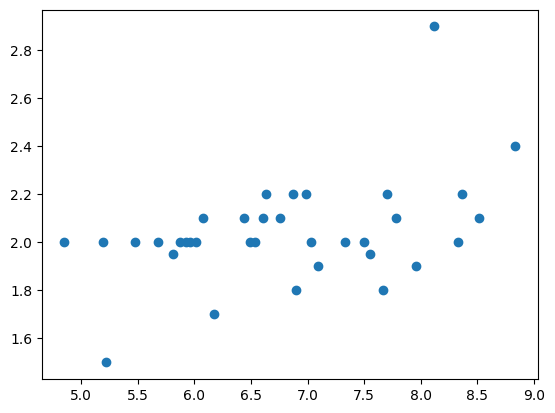

array([2.100e+00, 2.000e+00, 2.000e+00, 2.000e+00, 2.200e+00, 2.000e+00,
       1.800e+00, 2.100e+00, 2.000e+00, 2.100e+00, 1.900e+00, 1.950e+00,
       2.200e+00, 2.100e+00, 2.400e+00, 2.200e+00, 2.000e+00, 1.800e+00,
       2.900e+00, 2.000e+00, 1.900e+00, 2.000e+00, 2.000e+00, 2.000e+00,
       2.200e+00, 2.000e+00, 1.700e+00, 2.000e+00, 2.000e+00, 2.000e+00,
       2.100e+00, 2.100e+00, 2.200e+00, 1.500e+00, 1.950e+00, 2.000e+02,
       7.000e+01, 1.300e+00, 1.400e+00, 1.050e+02, 5.700e+01, 1.100e+02,
       1.100e+02, 1.083e+03, 1.300e+02, 1.120e+02, 1.200e+00, 1.700e+00,
       1.600e+00, 1.100e+02, 1.500e+00, 1.700e+00, 1.500e+00, 9.000e+01,
       1.400e+02, 9.000e+01, 1.400e+00, 1.500e+00, 1.400e+00, 8.500e+01,
       6.000e+01, 1.300e+02, 8.000e+01, 9.000e+01, 1.200e+00, 5.000e+01,
       8.000e+01, 1.000e+02, 1.100e+02, 1.650e+02, 7.000e+01, 1.000e+00,
       1.200e+00, 1.300e+00, 1.400e+00, 1.400e+00, 1.600e+00, 1.500e+00,
       1.600e+00, 1.500e+02, 9.600e+01, 8.100e+01, 

In [178]:
plt.plot(height.loc[height['site'] == 'Nestor Macias RGB']['diameter'].values, height.loc[height['site'] == 'Nestor Macias RGB']['height'].values, 'o')
plt.show()
height['height'].values

year    site                   
2016.0  Carlos Vera Guevara RGB    10.014801
        Nestor Macias RGB          17.468471
2017.0  Carlos Vera Arteaga RGB     5.231411
        Flora Pluas RGB            16.381194
2018.0  Leonor Aspiazu RGB          8.361402
2019.0  Manuel Macias RGB          12.228376
Name: diameter, dtype: float64
year    site                   
2016.0  Carlos Vera Guevara RGB     8.848994
        Nestor Macias RGB          15.501655
2017.0  Carlos Vera Arteaga RGB     4.774637
        Flora Pluas RGB            14.164757
2018.0  Leonor Aspiazu RGB          7.384772
2019.0  Manuel Macias RGB          13.750955
Name: diameter, dtype: float64
zero diameter timber (27, 15)
non-zero diameter timber (110, 15)


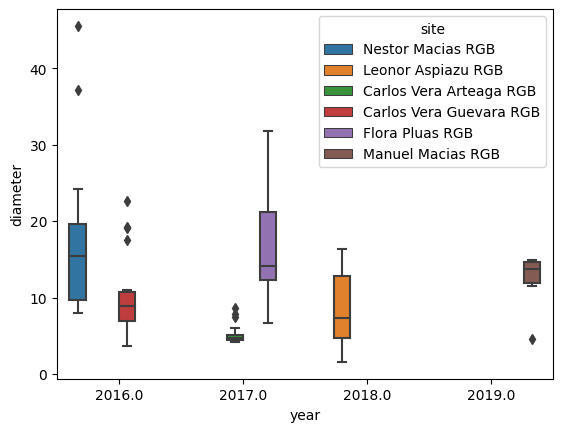

In [180]:
# Repeat for timber
sns.boxplot(x = trees.loc[(trees['group'] == 'timber') & (trees['diameter'] > 0)].year, 
            y = trees.loc[(trees['group'] == 'timber') & (trees['diameter'] > 0)].diameter, 
            hue = trees.loc[(trees['group'] == 'timber') & (trees['diameter'] > 0)].site)

print(trees.loc[(trees['group'] == 'timber') & (trees['diameter'] > 0)].groupby(['year', 'site']).diameter.mean())
print(trees.loc[(trees['group'] == 'timber') & (trees['diameter'] > 0)].groupby(['year', 'site']).diameter.median())

print('zero diameter timber', trees.loc[(trees['group'] == 'timber') & (trees['diameter'] == 0)].shape)

print('non-zero diameter timber', trees.loc[(trees['group'] == 'timber') & (trees['diameter'] != 0)].shape)

year    site                   
2016.0  Carlos Vera Guevara RGB     8.102846
        Nestor Macias RGB          10.774922
2017.0  Carlos Vera Arteaga RGB     6.361542
        Flora Pluas RGB            10.263444
2018.0  Leonor Aspiazu RGB          4.169213
2019.0  Manuel Macias RGB           4.980949
Name: diameter, dtype: float64
year    site                   
2016.0  Carlos Vera Guevara RGB     7.814489
        Nestor Macias RGB          10.185893
2017.0  Carlos Vera Arteaga RGB     5.411255
        Flora Pluas RGB            10.663356
2018.0  Leonor Aspiazu RGB          3.580978
2019.0  Manuel Macias RGB           4.774637
Name: diameter, dtype: float64
zero diameter fruit (113, 15)
non-zero diameter fruit (638, 15)


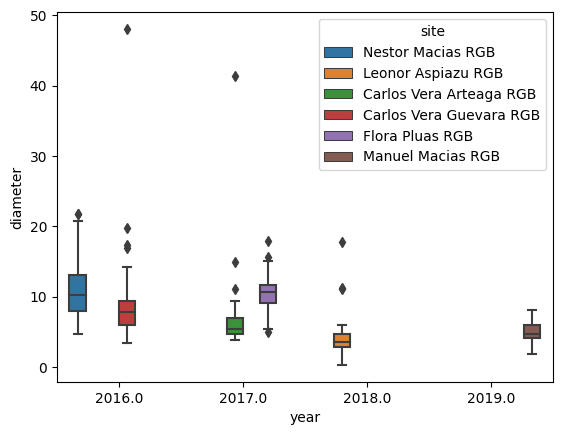

In [182]:
# Repeat for fruit
sns.boxplot(x = trees.loc[(trees['group'] == 'fruit') & (trees['diameter'] > 0)].year, 
            y = trees.loc[(trees['group'] == 'fruit') & (trees['diameter'] > 0)].diameter, 
            hue = trees.loc[(trees['group'] == 'fruit') & (trees['diameter'] > 0)].site)

print(trees.loc[(trees['group'] == 'fruit') & (trees['diameter'] > 0)].groupby(['year', 'site']).diameter.mean())
print(trees.loc[(trees['group'] == 'fruit') & (trees['diameter'] > 0)].groupby(['year', 'site']).diameter.median())

print('zero diameter fruit', trees.loc[(trees['group'] == 'fruit') & (trees['diameter'] == 0)].shape)

print('non-zero diameter fruit', trees.loc[(trees['group'] == 'fruit') & (trees['diameter'] != 0)].shape)

year    site                   
2016.0  Nestor Macias RGB           5.411255
2017.0  Carlos Vera Arteaga RGB     3.183091
        Flora Pluas RGB            14.323911
Name: diameter, dtype: float64
year    site                   
2016.0  Nestor Macias RGB           5.411255
2017.0  Carlos Vera Arteaga RGB     3.183091
        Flora Pluas RGB            14.323911
Name: diameter, dtype: float64
zero diameter citrus (65, 15)
non-zero diameter citrus (3, 15)


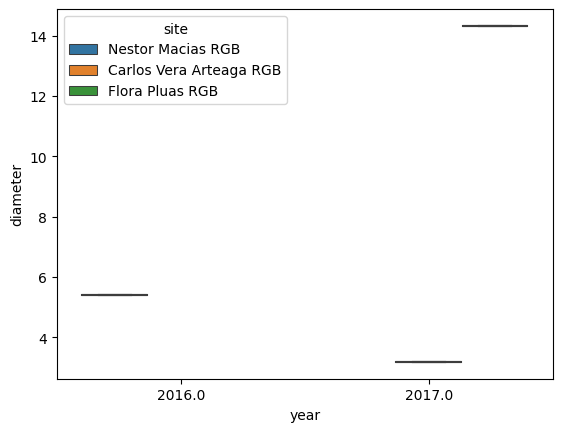

In [183]:
# Repeat for citrus
sns.boxplot(x = trees.loc[(trees['group'] == 'citrus') & (trees['diameter'] > 0)].year, 
            y = trees.loc[(trees['group'] == 'citrus') & (trees['diameter'] > 0)].diameter, 
            hue = trees.loc[(trees['group'] == 'citrus') & (trees['diameter'] > 0)].site)

print(trees.loc[(trees['group'] == 'citrus') & (trees['diameter'] > 0)].groupby(['year', 'site']).diameter.mean())
print(trees.loc[(trees['group'] == 'citrus') & (trees['diameter'] > 0)].groupby(['year', 'site']).diameter.median())

print('zero diameter citrus', trees.loc[(trees['group'] == 'citrus') & (trees['diameter'] == 0)].shape)

print('non-zero diameter citrus', trees.loc[(trees['group'] == 'citrus') & (trees['diameter'] != 0)].shape)

year    site                   
2016.0  Carlos Vera Guevara RGB     9.582157
        Nestor Macias RGB          10.522638
2017.0  Carlos Vera Arteaga RGB     8.744730
        Flora Pluas RGB            15.499193
2018.0  Leonor Aspiazu RGB         11.683259
2019.0  Manuel Macias RGB           6.603152
Name: diameter, dtype: float64
year    site                   
2016.0  Carlos Vera Guevara RGB     7.957729
        Nestor Macias RGB          10.267135
2017.0  Carlos Vera Arteaga RGB     9.014389
        Flora Pluas RGB            17.533910
2018.0  Leonor Aspiazu RGB          9.819837
2019.0  Manuel Macias RGB           6.623584
Name: diameter, dtype: float64
zero diameter other (7, 15)
non-zero diameter other (154, 15)


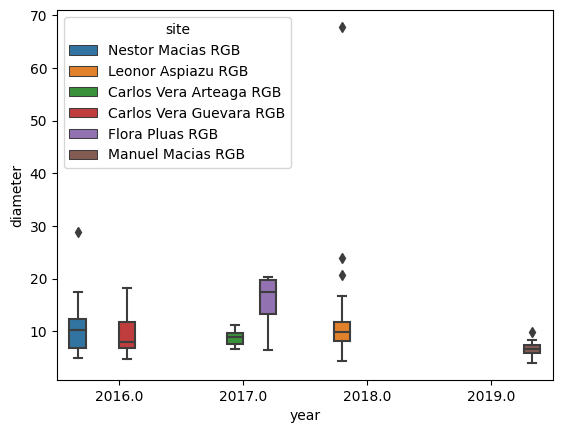

In [184]:
# Repeat for other
sns.boxplot(x = trees.loc[(trees['group'] == 'other') & (trees['diameter'] > 0)].year, 
            y = trees.loc[(trees['group'] == 'other') & (trees['diameter'] > 0)].diameter, 
            hue = trees.loc[(trees['group'] == 'other') & (trees['diameter'] > 0)].site)

print(trees.loc[(trees['group'] == 'other') & (trees['diameter'] > 0)].groupby(['year', 'site']).diameter.mean())
print(trees.loc[(trees['group'] == 'other') & (trees['diameter'] > 0)].groupby(['year', 'site']).diameter.median())

print('zero diameter other', trees.loc[(trees['group'] == 'other') & (trees['diameter'] == 0)].shape)

print('non-zero diameter other', trees.loc[(trees['group'] == 'other') & (trees['diameter'] != 0)].shape)